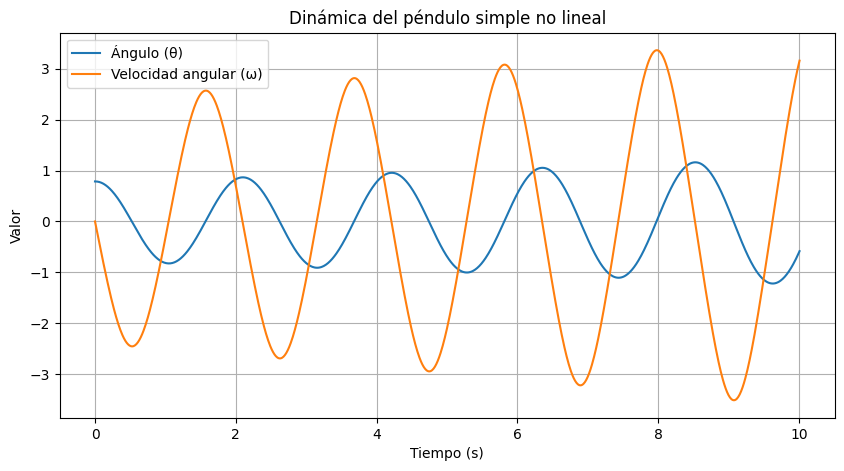

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del péndulo
g = 9.81  # aceleración debida a la gravedad (m/s^2)
L = 1.0   # longitud de la cuerda del péndulo (m)
dt = 0.01 # paso de tiempo (s)
t_max = 10 # tiempo máximo (s)

# Condiciones iniciales
theta_0 = np.pi / 4  # ángulo inicial (radianes)
omega_0 = 0.0       # velocidad angular inicial (rad/s)

# Inicializar listas para almacenar los resultados
theta = [theta_0]
omega = [omega_0]
t = [0]

# Método de Euler para la integración numérica
while t[-1] < t_max:
    theta_new = theta[-1] + omega[-1] * dt
    omega_new = omega[-1] - (g / L) * np.sin(theta[-1]) * dt
    
    theta.append(theta_new)
    omega.append(omega_new)
    t.append(t[-1] + dt)

# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.plot(t, theta, label='Ángulo (θ)')
plt.plot(t, omega, label='Velocidad angular (ω)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Valor')
plt.legend()
plt.title('Dinámica del péndulo simple no lineal')
plt.grid(True)
plt.show()

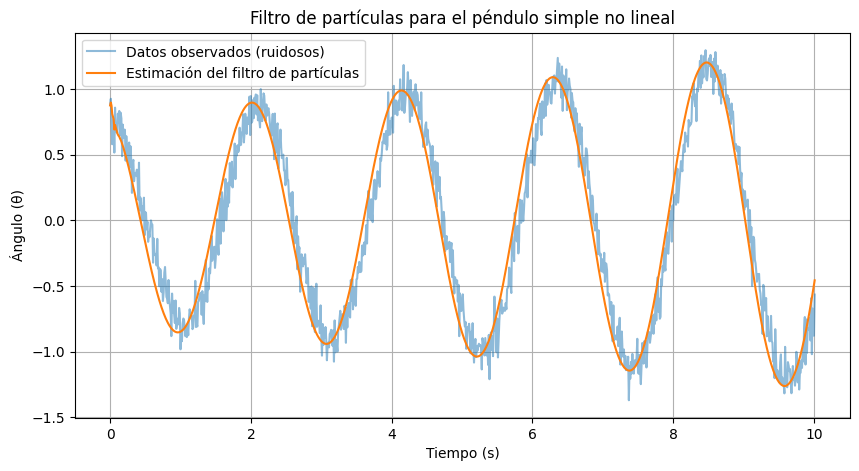

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del péndulo
g = 9.81  # aceleración debida a la gravedad (m/s^2)
L = 1.0   # longitud de la cuerda del péndulo (m)
dt = 0.01 # paso de tiempo (s)
t_max = 10 # tiempo máximo (s)

# Condiciones iniciales
theta_0 = np.pi / 4  # ángulo inicial (radianes)
omega_0 = 0.0       # velocidad angular inicial (rad/s)

# Modelo del péndulo
def pendulum_model(theta, omega, dt):
    theta_new = theta + omega * dt
    omega_new = omega - (g / L) * np.sin(theta) * dt
    return theta_new, omega_new

# Generar datos observados con ruido
def generate_noisy_data(theta_0, omega_0, t_max, dt):
    theta = [theta_0]
    omega = [omega_0]
    t = [0]
    while t[-1] < t_max:
        theta_new, omega_new = pendulum_model(theta[-1], omega[-1], dt)
        theta.append(theta_new)
        omega.append(omega_new)
        t.append(t[-1] + dt)
    theta_noisy = theta + np.random.normal(0, 0.1, len(theta))
    return np.array(t), np.array(theta_noisy)

# Filtro de partículas
def particle_filter(num_particles, theta_noisy, dt):
    particles = np.random.normal(0, 1, (num_particles, 2))
    weights = np.ones(num_particles) / num_particles
    estimated_states = []

    for theta_obs in theta_noisy:
        # Predicción
        for i in range(num_particles):
            particles[i, 0], particles[i, 1] = pendulum_model(particles[i, 0], particles[i, 1], dt)
        
        # Actualización
        weights *= np.exp(-0.5 * ((particles[:, 0] - theta_obs) ** 2) / 0.1 ** 2)
        weights += 1.e-300  # Evitar ceros
        weights /= np.sum(weights)
        
        # Resampling
        indices = np.random.choice(range(num_particles), size=num_particles, p=weights)
        particles = particles[indices]
        weights = weights[indices]
        weights /= np.sum(weights)
        
        # Estimación
        estimated_state = np.average(particles, weights=weights, axis=0)
        estimated_states.append(estimated_state)
    
    return np.array(estimated_states)

# Generar datos observados
t, theta_noisy = generate_noisy_data(theta_0, omega_0, t_max, dt)

# Aplicar filtro de partículas
num_particles = 1000
estimated_states = particle_filter(num_particles, theta_noisy, dt)

# Graficar resultados
plt.figure(figsize=(10, 5))
plt.plot(t, theta_noisy, label='Datos observados (ruidosos)', alpha=0.5)
plt.plot(t, estimated_states[:, 0], label='Estimación del filtro de partículas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (θ)')
plt.legend()
plt.title('Filtro de partículas para el péndulo simple no lineal')
plt.grid(True)
plt.show()